In [1]:
from net import Net, Observations
import estimators
import detectors
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
net1 = pickle.load(open("net1.p", "br"))
q_bc = np.array(
    [
        -0.7367,
        -4.2121,
        -0.0424,
        -1.9237,
        -1.9254,
        -2.6563,
        0.0,
        0.0,
        0.0,
        6.8244,
    ]
)
p_bc = 3.3139
n_days = 10

In [3]:
obs = Observations(net1)
detector = detectors.CusumTest()

obs.calc_real_values(q_bc, p_bc, n_days)

# Tracking pressure measurement error

### Tracking the $\mu$ coefficient shared by all pipelines

In [4]:
q_obs, p_obs = obs.sample(err_type="p", err_node=10, err_magnitude=err_magnitude)
coef_est = np.zeros(24 * n_days)
est = estimators.Est_mu(net1)
for t in range(24 * n_days):
    coef_est[t] = est.get_coef(q_obs[t], p_obs[t])

plt.plot(coef_est)
plt.show()

NameError: name 'err_magnitude' is not defined

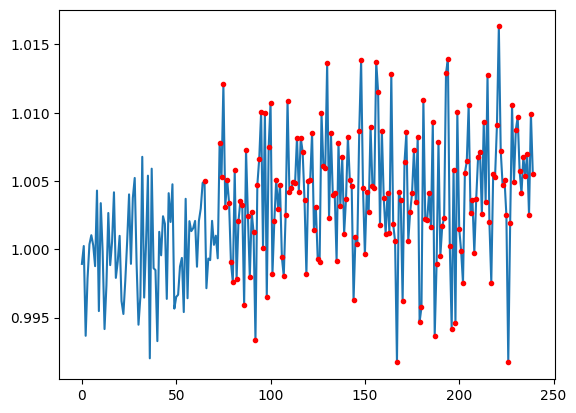

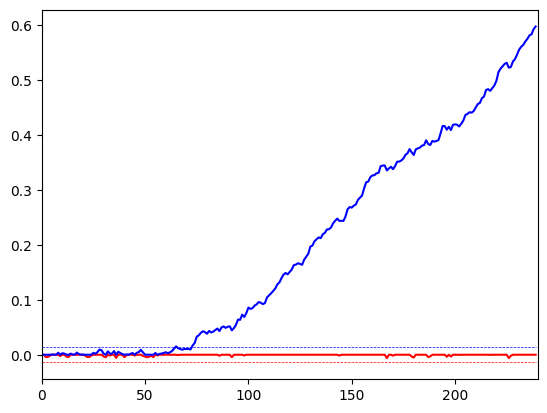

In [ ]:
detector.detect(coef_est)
detector.plot_result()
plt.show()

detector.plot_statistics()
plt.show()

The problem is that it is fundamentally impossible to determine in which node an error has occurred

### Tracking the $\gamma$ coefficient separately for each pipeline

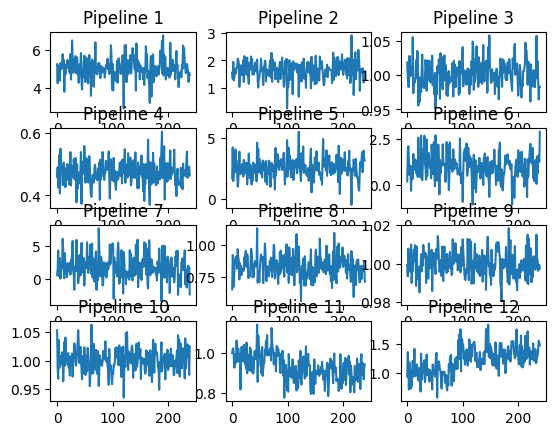

In [8]:
q_obs, p_obs = obs.sample(err_type="p", err_node=5-1, err_magnitude=0.015)
coef_est = np.zeros([24 * n_days, net1.M])
est = estimators.Est_gamma(net1)
for t in range(24 * n_days):
    coef_est[t, :] = est.get_coef(q_obs[t], p_obs[t])

for i in range(net1.M):
    plt.subplot(4, 3, i + 1)
    plt.title(f"Pipeline {i+1}")
    plt.plot(coef_est[:, i])

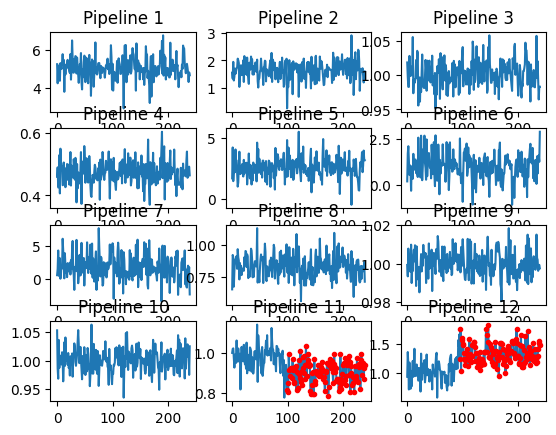

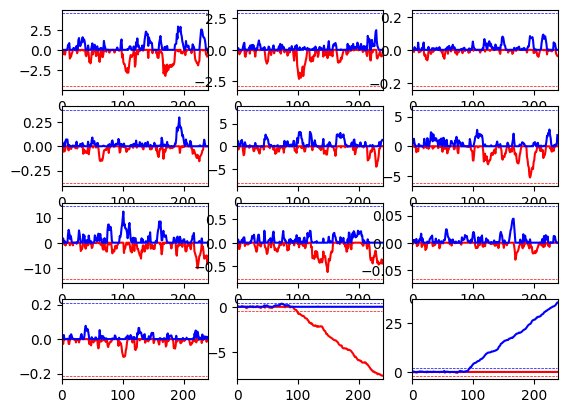

In [9]:
detector = detectors.CusumTest(climit=10)
for i in range(net1.M):
    detector.detect(coef_est[:, i])
    
    plt.figure(1)
    plt.subplot(4, 3, i + 1)
    plt.title(f"Pipeline {i+1}")
    detector.plot_result()

    plt.figure(2)
    plt.subplot(4, 3, i + 1)
    detector.plot_statistics()

plt.show()

Here we can determine that the breakdown occurs on pipelines 11, 12 and to a lesser extent on pipeline 10. From this we can conclude that the problem occurs at node 5 (see graph below), where the error was set. 

![title](graph.png)

# Tracking flow rate measurement error

### Tracking the $\omega$ coefficient separately for each node

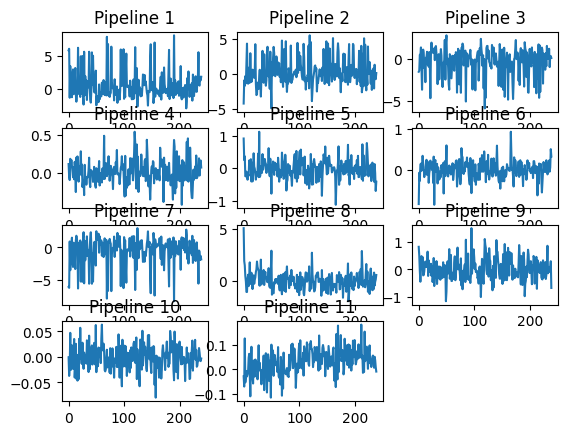

In [10]:
q_obs, p_obs = obs.sample(err_type="q", err_node=11-1, err_magnitude=0.05)
coef_est = np.zeros([24 * n_days, net1.N])
est = estimators.Est_omega(net1)
for t in range(24 * n_days):
    coef_est[t, :] = est.get_coef(q_obs[t], p_obs[t])

for i in range(net1.N):
    plt.subplot(4, 3, i + 1)
    plt.title(f"Pipeline {i+1}")
    plt.plot(coef_est[:, i])

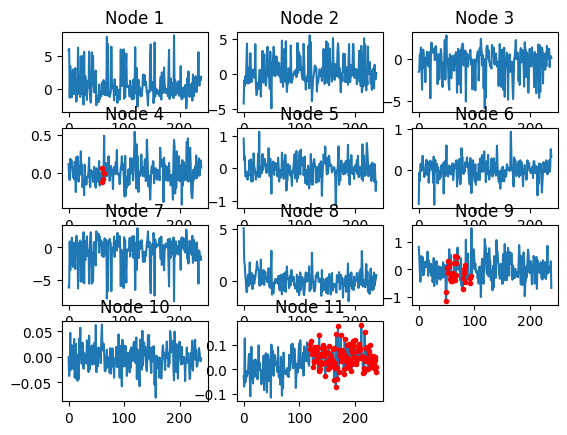

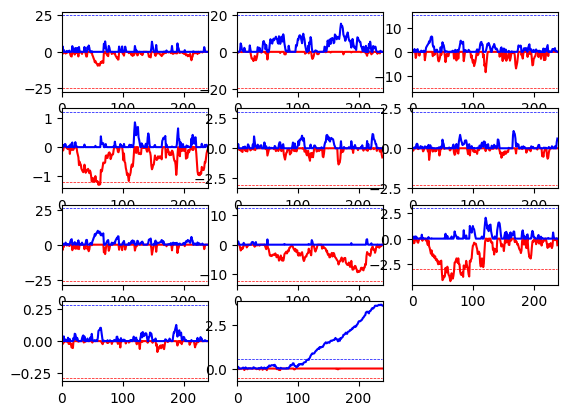

In [11]:
detector = detectors.CusumTest(climit=10)
for i in range(net1.N):
    detector.detect(coef_est[:, i])
    
    plt.figure(1)
    plt.subplot(4, 3, i + 1)
    plt.title(f"Node {i+1}")
    detector.plot_result()

    plt.figure(2)
    plt.subplot(4, 3, i + 1)
    detector.plot_statistics()

plt.show()

Here we can directly see that the fault appears in the node where the error is assigned.